<a href="https://colab.research.google.com/github/inaafina/ArrhythmiaFinalProjectAI/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - Team**

**Model selection, Decision Tree, kNN, Naïve Bayes**

Nur Afina Rahmani (1301202563)

Afri Almuharram Putra Erlana Jaya	 (1301203304)


Dataset: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

---





# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Loading Dataset

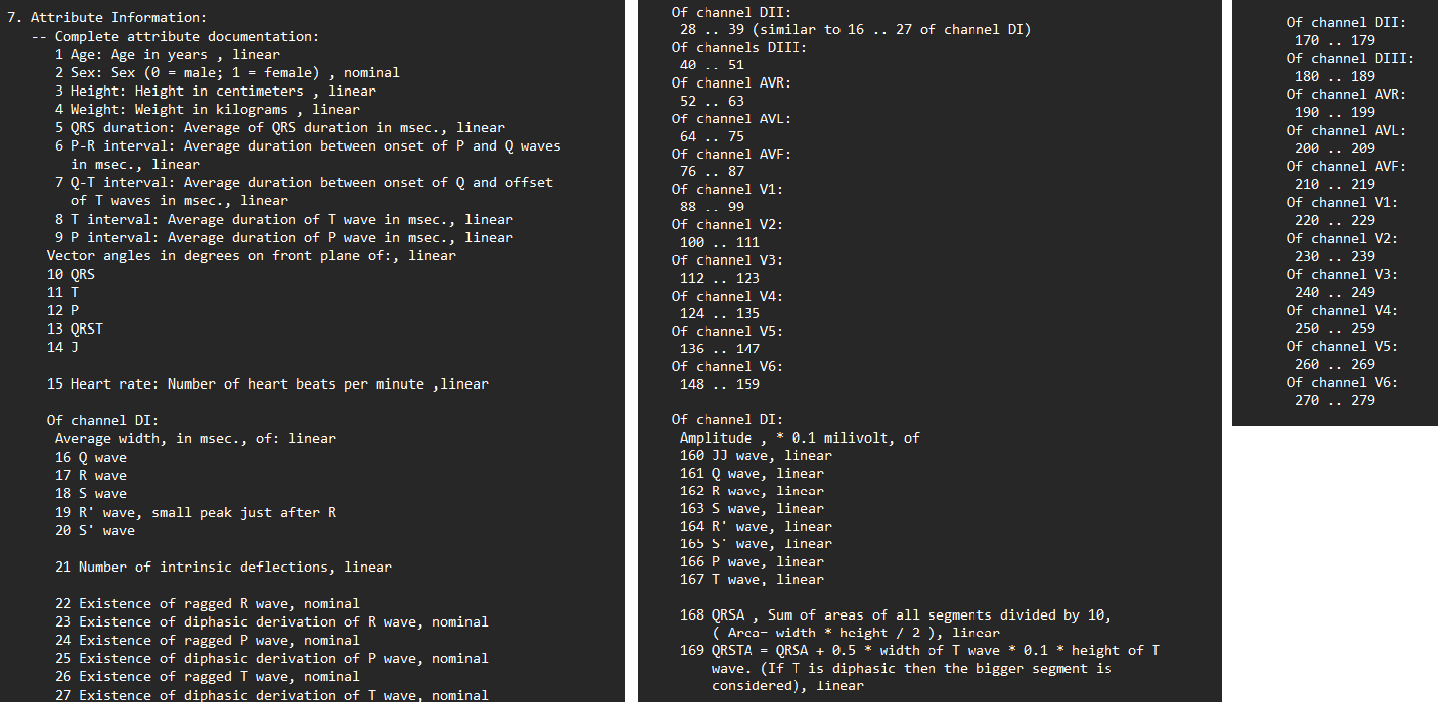

In [3]:
df = pd.read_csv('arrhythmia.csv')

In [4]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,271,272,273,274,275,276,277,278,279,280
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


# Data Pre-processing

## Checking the null value of each attributes 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 1 to 280
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [6]:
df.replace("?", np.nan, inplace=True)

In [7]:
# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Verify the data type conversion
print(df.dtypes)

1        int64
2        int64
3        int64
4        int64
5        int64
        ...   
276    float64
277    float64
278    float64
279    float64
280      int64
Length: 280, dtype: object


## Mean Imputation

In [8]:
column_mean_11 = df['11'].mean()
column_mean_12 = df['12'].mean()
column_mean_13 = df['13'].mean()
column_mean_14 = df['14'].mean()
column_mean_15 = df['15'].mean()
print("Mean of the column 11:", column_mean_11)
print("Mean of the column 12:", column_mean_12)
print("Mean of the column 13:", column_mean_13)
print("Mean of the column 14:", column_mean_14)
print("Mean of the column 15:", column_mean_15)

Mean of the column 11: 36.1509009009009
Mean of the column 12: 48.913953488372094
Mean of the column 13: 36.71618625277162
Mean of the column 14: -13.592105263157896
Mean of the column 15: 74.46341463414635


In [9]:
# Replace NaN values with the mean
df['11'].fillna(column_mean_11, inplace=True)
df['12'].fillna(column_mean_12, inplace=True)
df['13'].fillna(column_mean_13, inplace=True)
df['14'].fillna(column_mean_14, inplace=True)
df['15'].fillna(column_mean_15, inplace=True)

In [12]:
null_counts = df.isnull().sum()
print("Null value counts per column:")

for column, count in null_counts.iteritems():
  print(f"{column}: {count}")

Null value counts per column:
1: 0
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0
10: 0
11: 0
12: 0
13: 0
14: 0
15: 0
16: 0
17: 0
18: 0
19: 0
20: 0
21: 0
22: 0
23: 0
24: 0
25: 0
26: 0
27: 0
28: 0
29: 0
30: 0
31: 0
32: 0
33: 0
34: 0
35: 0
36: 0
37: 0
38: 0
39: 0
40: 0
41: 0
42: 0
43: 0
44: 0
45: 0
46: 0
47: 0
48: 0
49: 0
50: 0
51: 0
52: 0
53: 0
54: 0
55: 0
56: 0
57: 0
58: 0
59: 0
60: 0
61: 0
62: 0
63: 0
64: 0
65: 0
66: 0
67: 0
68: 0
69: 0
70: 0
71: 0
72: 0
73: 0
74: 0
75: 0
76: 0
77: 0
78: 0
79: 0
80: 0
81: 0
82: 0
83: 0
84: 0
85: 0
86: 0
87: 0
88: 0
89: 0
90: 0
91: 0
92: 0
93: 0
94: 0
95: 0
96: 0
97: 0
98: 0
99: 0
100: 0
101: 0
102: 0
103: 0
104: 0
105: 0
106: 0
107: 0
108: 0
109: 0
110: 0
111: 0
112: 0
113: 0
114: 0
115: 0
116: 0
117: 0
118: 0
119: 0
120: 0
121: 0
122: 0
123: 0
124: 0
125: 0
126: 0
127: 0
128: 0
129: 0
130: 0
131: 0
132: 0
133: 0
134: 0
135: 0
136: 0
137: 0
138: 0
139: 0
140: 0
141: 0
142: 0
143: 0
144: 0
145: 0
146: 0
147: 0
148: 0
149: 0
150: 0
151: 0
152: 0
153: 0
154: 0


<ipython-input-12-f3a7408f87bd>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, count in null_counts.iteritems():


## Scatter plot 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


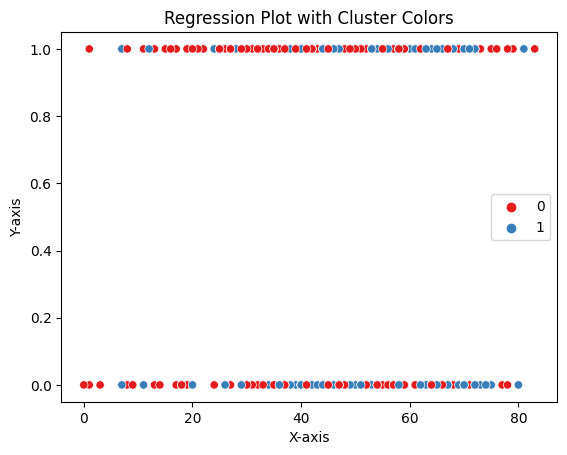

In [11]:
import seaborn as sns
from sklearn.cluster import KMeans

# Select the columns you want to use for clustering
X = df.iloc[:, :]  # Replace with your desired columns

# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2)  # Replace 2 with your desired number of clusters

# Fit the data to the KMeans model
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Create a scatter plot with different colors for each cluster using Seaborn
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=labels, palette='Set1')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Regression Plot with Cluster Colors')

# Display the plot
plt.show()

## Calculating the mean and standard deviation

In [14]:
df = (df - df.mean())/df.std()
print(df)

            1         2         3         4         5         6         7  \
0    1.732520 -1.106294  0.640617  0.713024  0.135355  0.844010  0.113584   
1    0.578671  0.901919 -0.031962 -0.251365 -0.515501  0.420303  1.012179   
2    0.457213 -1.106294  0.156360  1.617140  3.194376  0.174999  0.562881   
3    0.517942 -1.106294  0.237069  1.556865  0.721125  1.044714  0.383162   
4    1.732520 -1.106294  0.640617  0.713024 -0.059902  0.576406 -0.215902   
..        ...       ...       ...       ...       ...       ...       ...   
447  0.396484  0.901919 -0.166478  0.110281 -0.580586  0.977813  0.443069   
448 -0.575178 -1.106294  0.640617  1.014396  0.721125 -0.404811 -0.185948   
449 -0.635907 -1.106294 -0.005059 -0.010268  1.241809  0.464904 -0.066136   
450 -0.878822  0.901919 -0.300994 -0.793835  0.265526 -1.096123  0.562881   
451  1.914706  0.901919 -0.166478  0.110281 -0.645672 -0.627815 -0.096089   

            8         9        10  ...       271       272        273  \
0 

# Data Exploration

## KNN

# **Reference**

https://stackoverflow.com/questions/62435218/how-to-read-the-dataset-data-and-names-directly-into-python-dataframe-from-u

https://stackoverflow.com/questions/71479659/dataframes-from-data-names-and-test-files-using-pandas